In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score
from sentence_transformers import SentenceTransformer
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

In [19]:
# Initialisation du Sentence Transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Charger les données NG20 et leurs étiquettes
ng20 = fetch_20newsgroups(subset='all')
data = ng20['data'][:2000]  # Charger seulement 2000 documents
labels = ng20['target'][:2000]

# Création des embeddings pour les documents
embeddings = model.encode(data, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [20]:
# Réduction de dimension avec t-SNE
tsne_model = TSNE(n_components=3, random_state=42)
X_reduced = tsne_model.fit_transform(embeddings)

In [21]:
# Définition des modèles de clustering
clustering_models = {
    'KMeans': KMeans(n_clusters=20, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=20)
}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


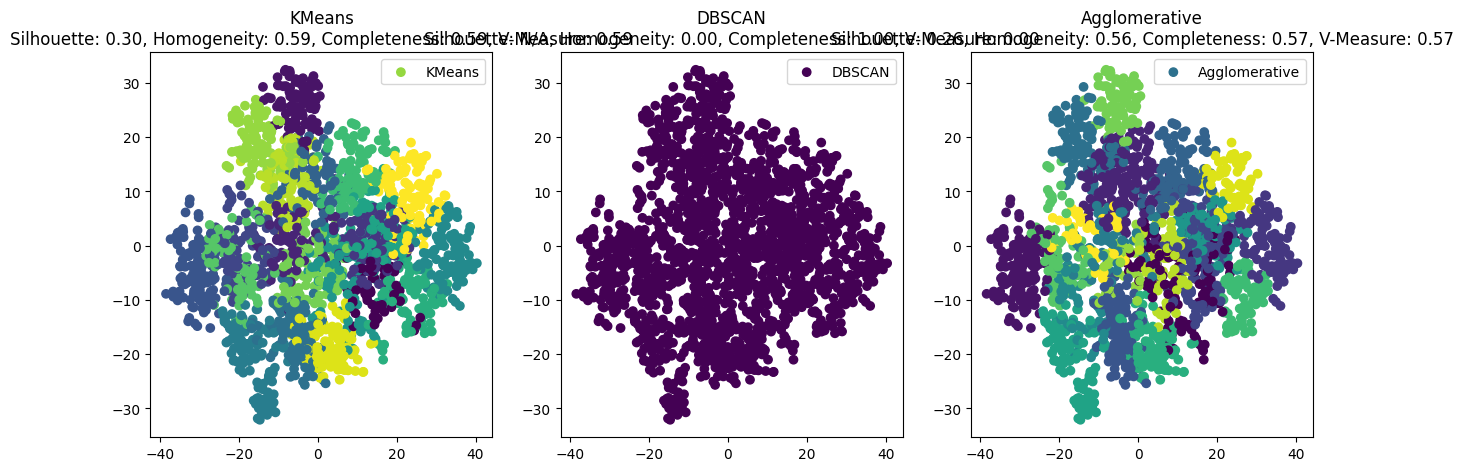

In [22]:
# Évaluation des modèles et visualisation
metrics_results = {}

fig, axes = plt.subplots(1, len(clustering_models), figsize=(15, 5))

for i, (name, clustering_model) in enumerate(clustering_models.items()):
    clusters = clustering_model.fit_predict(X_reduced)

    # Vérifier le nombre de clusters formés
    n_clusters = len(np.unique(clusters))
    if n_clusters > 1 and n_clusters < len(clusters):
        silhouette_avg = silhouette_score(X_reduced, clusters)
    else:
        silhouette_avg = "N/A"  # Non applicable si un seul cluster ou tous les points sont des bruits

    # Calcul des autres métriques (en utilisant les étiquettes réelles)
    homogeneity = homogeneity_score(labels, clusters)
    completeness = completeness_score(labels, clusters)
    v_measure = v_measure_score(labels, clusters)

    metrics_results[name] = [silhouette_avg, homogeneity, completeness, v_measure]
      # Visualisation
    axes[i].scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', label=name)
    title = f"{name}\n"
    title += f"Silhouette: {silhouette_avg:.2f}, " if silhouette_avg != "N/A" else "Silhouette: N/A, "
    title += f"Homogeneity: {homogeneity:.2f}, Completeness: {completeness:.2f}, V-Measure: {v_measure:.2f}"
    axes[i].set_title(title)
    axes[i].legend()



plt.show()


In [23]:
# Affichage des résultats des métriques


metrics_results = {}
for name, clustering_model in clustering_models.items():
    clusters = clustering_model.fit_predict(X_reduced)


    if len(set(clusters)) > 1:
        silhouette_avg = silhouette_score(X_reduced, clusters)
    else:
        silhouette_avg = "N/A"


    homogeneity = homogeneity_score(labels, clusters)
    completeness = completeness_score(labels, clusters)
    v_measure = v_measure_score(labels, clusters)
    nmi_score = normalized_mutual_info_score(labels, clusters)
    ari_score = adjusted_rand_score(labels, clusters)

    metrics_results[name] = {
        'Silhouette': silhouette_avg,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V-Measure': v_measure,
        'NMI': nmi_score,
        'ARI': ari_score
    }

# Affichage des metriques
for model_name, scores in metrics_results.items():
    print(f"Results for {model_name}:")
    for metric, value in scores.items():
        print(f"{metric}: {value:.2f}" if value != "N/A" else f"{metric}: {value}")
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Results for KMeans:
Silhouette: 0.30
Homogeneity: 0.59
Completeness: 0.59
V-Measure: 0.59
NMI: 0.59
ARI: 0.42


Results for DBSCAN:
Silhouette: N/A
Homogeneity: 0.00
Completeness: 1.00
V-Measure: 0.00
NMI: 0.00
ARI: 0.00


Results for Agglomerative:
Silhouette: 0.26
Homogeneity: 0.56
Completeness: 0.57
V-Measure: 0.57
NMI: 0.57
ARI: 0.39


